In [32]:
import math
import random 
import collections
import numpy as np

import nest_asyncio
import tensorflow as tf
import tensorflow_federated as tff
import seaborn as sns

from tensorflow.keras import activations
from statistics import mean
from collections import Counter

from tqdm.notebook import tqdm as tqdm_notebook

import seaborn as sns
from matplotlib import pyplot as plt

from math import sqrt

sns.set_theme(style= 'whitegrid')
nest_asyncio.apply()
tff.backends.reference.set_reference_context()

### Data augmentation

In [33]:
from random import randint, choice, shuffle
from math import ceil
from itertools import chain

In [34]:
feature_space = {
'class1':[ range(randint(0, 15),randint(1000, 2000)),
              range(randint(10, 25),randint(2000, 3000)),
              range(randint(20, 35),randint(3000, 4000)),
              range(randint(30, 45),randint(4000, 5000)),
              range(randint(40, 55),randint(5000, 6000)),
              range(randint(50, 65),randint(6000, 7000)),
              range(randint(60, 75),randint(7000, 8000)),
              range(randint(70, 85),randint(8000, 9000)),
              range(randint(80, 95),randint(9000, 10000)),
              range(randint(90, 105),randint(10000, 11000))],
    
 'class2':[range(randint(10, 25),randint(1500, 2500)),
              range(randint(20, 35),randint(2500, 3500)),
              range(randint(30, 45),randint(3500, 4500)),
              range(randint(40, 55),randint(4500, 5500)),
              range(randint(50, 65),randint(5500, 6500)),
              range(randint(60, 75),randint(6500, 7500)),
              range(randint(70, 85),randint(7500, 8500)),
              range(randint(80, 95),randint(8500, 9500)),
              range(randint(90, 105),randint(9500, 10500)),
              range(randint(100, 115),randint(10500, 11500))],
    
    
'class3':[range(randint(20, 35),randint(2000, 3000)),
              range(randint(30, 45),randint(3000, 4000)),
              range(randint(40, 55),randint(4000, 5000)),
              range(randint(50, 65),randint(5000, 6000)),
              range(randint(60, 75),randint(6000, 7000)),
              range(randint(70, 85),randint(7000, 8000)),
              range(randint(80, 95),randint(8000, 90000)),
              range(randint(90, 105),randint(9000, 10000)),
              range(randint(100, 115),randint(10000, 11000)),
              range(randint(110, 125),randint(11000, 12000))],
    
'class4':[range(randint(30, 45),randint(2500, 3500)),
              range(randint(40, 55),randint(3500, 4500)),
              range(randint(50, 65),randint(4500, 5500)),
              range(randint(60, 75),randint(5500, 6500)),
              range(randint(70, 85),randint(6500, 7500)),
              range(randint(80, 95),randint(7500, 8500)),
              range(randint(90, 105),randint(8500, 9500)),
              range(randint(100, 115),randint(9500, 10500)),
              range(randint(110, 125),randint(10500, 11500)),
              range(randint(120, 135),randint(11500, 12500))],
    
'class5':[range(randint(40, 55),randint(3000, 4000)),
              range(randint(50, 65),randint(4000, 5000)),
              range(randint(60, 75),randint(5000, 6000)),
              range(randint(70, 85),randint(6000, 7000)),
              range(randint(80, 95),randint(7000, 8000)),
              range(randint(90, 105),randint(8000, 9000)),
              range(randint(100, 115),randint(9000, 10000)),
              range(randint(110, 125),randint(10000, 11000)),
              range(randint(120, 135),randint(11000, 12000)),
              range(randint(130, 145),randint(12000, 13000))],
    
}

def datapicker(fs, numodpoints):
    data = {}
    for i in fs:
        temp = []
        for ii in range(numodpoints):
            point = []
            for iii in fs.get(i):
                point.append(choice(iii))
            temp.append(point)
        data[i]=temp
    return data

In [35]:
DATAPOINTS = 10000
data = datapicker(feature_space,DATAPOINTS)

In [36]:
# import numpy as np
# import pandas as pd
# from sklearn.decomposition import PCA
# from matplotlib import pyplot as plt
# import seaborn as sns
# from sklearn.cluster import OPTICS, cluster_optics_dbscan
# from collections import defaultdict as ddict
# sns.set_style("whitegrid")


# from math import floor, ceil
# def convert(lst):
#     l =[]
#     for i in lst:
#         if i<0:l.append(0)
#         elif i//100==0:l.append(0)
#         elif i//200==0:l.append(1)
#         elif i//300==0:l.append(2)
#         elif i//400==0:l.append(3)
#         elif i//500==0:l.append(4)
#         elif i//600==0:l.append(5)
#         elif i//700==0:l.append(6)
#         elif i//800==0:l.append(7)
#         elif i//900==0:l.append(8)
#         elif i//1000==0:l.append(9)
#         elif i//1100==0:l.append(10)
#         elif i//1200==0:l.append(11)
#         elif i//1300==0:l.append(12)
#         elif i//1400==0:l.append(13)
#         elif i//1500==0:l.append(14)
#         else:print(i)
#     return l

# def toDF(data):
#     rtn = ddict(list)
#     for i in data:
#         for ii in data[i]:
#             rtn['class'].append(i)
#             f1,f2,f3,f4,f5,f6,f7,f8,f9,f10 = ii
#             rtn['f1'].append(f1)
#             rtn['f2'].append(f2)
#             rtn['f3'].append(f3)
#             rtn['f4'].append(f4)
#             rtn['f5'].append(f5)
#             rtn['f6'].append(f6)
#             rtn['f7'].append(f7)
#             rtn['f8'].append(f8)
#             rtn['f9'].append(f9)
#             rtn['f10'].append(f10)
#     return pd.DataFrame(rtn)

# from sklearn.manifold import TSNE

# X_embedded = PCA(n_components=3).fit_transform(toDF(data)[['f1','f2','f3','f4','f5','f6','f7','f8','f9']])

# clusters =  OPTICS(eps=3,min_samples=2).fit_predict(X_embedded)

# X_embedded = pd.DataFrame(list(map(lambda x:{'x':x[0][0],'y':x[0][1], 'z':x[0][2],'c':x[1]},zip(X_embedded,clusters))))

# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.colors import ListedColormap

# # axes instance
# fig = plt.figure(figsize=(6,6))
# ax = Axes3D(fig)

# # get colormap from seaborn
# cmap = ListedColormap(sns.color_palette("tab10").as_hex())

# # plot
# sc = ax.scatter(X_embedded.x, X_embedded.y, X_embedded.z, s=40, c=convert(X_embedded.c), marker='.', cmap=cmap, alpha=1)
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')

# # legend
# plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2,title="Cluster ID")
# plt.show()

In [37]:
def convert(lst,cls):
    LIST = lst[:]
    LIST.append(int(cls[-1:]))
    return LIST

In [38]:
def clientDATA(numofclient,data):
    clients = {}
    for i in range(numofclient):
        mjc = set()
        
        cls = choice(list(data.keys()))
        
        mjc.add(cls)
        
        oc = set(data.keys())-mjc

        mjv = randint(75,80)

        ocv = randint(mjv//10, (mjv//10)+15)

        mjdata = data.get(mjc.pop())

        rslt = list(map(lambda x:convert(x,cls) , mjdata[:ceil(len(mjdata)*mjv/100)]))+list(chain.from_iterable(list(map(lambda x:list(map(lambda y:convert(y,x) , mjdata[:ceil(len(mjdata)*ocv/100)])),oc))))
        
        clients[i] = rslt
    return clients

In [39]:
CLIENT1, CLIENT2, CLIENT3, CLIENT4, CLIENT5, CLIENT6, CLIENT7, CLIENT8, CLIENT9, CLIENT10,= clientDATA(10,data).values()

### Clients Data

In [40]:
def get_batches(HOLDER):
    federated_data = []
    for i in HOLDER:
        client = []
        for index in range(len(i)//100):
            X= []
            Y= []
            for elements in i[index*100:index*100+100]:
                X.append(np.array([np.float32(elements[0]/10000),
                                   np.float32(elements[1]/10000),
                                   np.float32(elements[2]/10000),
                                   np.float32(elements[3]/10000),
                                   np.float32(elements[4]/10000),
                                   np.float32(elements[5]/10000),
                                   np.float32(elements[6]/10000),
                                   np.float32(elements[7]/10000),
                                   np.float32(elements[8]/10000),
                                   np.float32(elements[9]/10000),
                                  ]))
                Y.append(np.array(np.int32(elements[10])))
            client.append({
                'x':np.array(X),
                'y':np.array(Y)
            })
        federated_data.append(client)
    return federated_data

In [41]:
def poissonDistributiondata(clientData):
    data = random.sample(clientData,2000)
    return [data[:1000],data[1000:1500],data[1500:]]

In [42]:
def reselectClientData():
    c1_tra, c1_val, c1_test = poissonDistributiondata(CLIENT1)
    c2_tra, c2_val, c2_test = poissonDistributiondata(CLIENT2)
    c3_tra, c3_val, c3_test = poissonDistributiondata(CLIENT3)
    c4_tra, c4_val, c4_test = poissonDistributiondata(CLIENT4)
    c5_tra, c5_val, c5_test = poissonDistributiondata(CLIENT5)
    c6_tra, c6_val, c6_test = poissonDistributiondata(CLIENT6)
    c7_tra, c7_val, c7_test = poissonDistributiondata(CLIENT7)
    c8_tra, c8_val, c8_test = poissonDistributiondata(CLIENT8)
    c9_tra, c9_val, c9_test = poissonDistributiondata(CLIENT9)
    c10_tra, c10_val, c10_test = poissonDistributiondata(CLIENT10)

    train = [c1_tra,   c2_tra,  c3_tra, c4_tra,   c5_tra,  c6_tra, c7_tra,   c8_tra,  c9_tra, c10_tra]
    val   = [c1_val,   c2_val,  c3_val, c4_val,   c5_val,  c6_val, c7_val,   c8_val,  c9_val, c10_val]
    test  = [c1_test,  c2_test, c3_test, c4_test, c5_test, c6_test, c7_test, c8_test, c9_test, c10_test]

    federated_train_data      =  get_batches(train)
    federated_validation_data =  get_batches(val)
    federated_test_data       =  get_batches(test)
    
    #count
    ARR.append([Counter(list(map(lambda x: x[-1], c1_tra))), 
                Counter(list(map(lambda x: x[-1], c2_tra))), 
                Counter(list(map(lambda x: x[-1], c3_tra))),
                Counter(list(map(lambda x: x[-1], c4_tra))), 
                Counter(list(map(lambda x: x[-1], c5_tra))), 
                Counter(list(map(lambda x: x[-1], c6_tra))),
                Counter(list(map(lambda x: x[-1], c7_tra))), 
                Counter(list(map(lambda x: x[-1], c8_tra))), 
                Counter(list(map(lambda x: x[-1], c9_tra))),
                Counter(list(map(lambda x: x[-1], c10_tra)))])
    #mean
    
    return (federated_train_data,federated_validation_data,federated_test_data)

In [43]:
if all([None]) : 
    print(1)
else:
    print(3)

3


In [44]:
def get_mean(arr_history):
    client1_means  = [i[0] for i in arr_history]
    client2_means  = [i[1] for i in arr_history]
    client3_means  = [i[2] for i in arr_history]
    client4_means  = [i[3] for i in arr_history]
    client5_means  = [i[4] for i in arr_history]
    client6_means  = [i[5] for i in arr_history]
    client7_means  = [i[6] for i in arr_history]
    client8_means  = [i[7] for i in arr_history]
    client9_means  = [i[8] for i in arr_history]
    client10_means = [i[9] for i in arr_history]
    
    client1_means_vals_c1 = [0]
    client1_means_vals_c2 = [0]    
    client1_means_vals_c3 = [0]
    client1_means_vals_c4 = [0]    
    client1_means_vals_c5 = [0] 
    
    client2_means_vals_c1 = [0]
    client2_means_vals_c2 = [0]    
    client2_means_vals_c3 = [0]
    client2_means_vals_c4 = [0]    
    client2_means_vals_c5 = [0] 
    
    client3_means_vals_c1 = [0]
    client3_means_vals_c2 = [0]    
    client3_means_vals_c3 = [0]
    client3_means_vals_c4 = [0]    
    client3_means_vals_c5 = [0]
    
    client4_means_vals_c1 = [0]
    client4_means_vals_c2 = [0]    
    client4_means_vals_c3 = [0]
    client4_means_vals_c4 = [0]    
    client4_means_vals_c5 = [0] 
    
    client5_means_vals_c1 = [0]
    client5_means_vals_c2 = [0]    
    client5_means_vals_c3 = [0]
    client5_means_vals_c4 = [0]    
    client5_means_vals_c5 = [0] 
    
    client6_means_vals_c1 = [0]
    client6_means_vals_c2 = [0]    
    client6_means_vals_c3 = [0]
    client6_means_vals_c4 = [0]    
    client6_means_vals_c5 = [0]
    
    client7_means_vals_c1 = [0]
    client7_means_vals_c2 = [0]    
    client7_means_vals_c3 = [0]
    client7_means_vals_c4 = [0]    
    client7_means_vals_c5 = [0]
    
    client8_means_vals_c1 = [0]
    client8_means_vals_c2 = [0]    
    client8_means_vals_c3 = [0]
    client8_means_vals_c4 = [0]    
    client8_means_vals_c5 = [0]
    
    client9_means_vals_c1 = [0]
    client9_means_vals_c2 = [0]    
    client9_means_vals_c3 = [0]
    client9_means_vals_c4 = [0]    
    client9_means_vals_c5 = [0]
    
    client10_means_vals_c1 = [0]
    client10_means_vals_c2 = [0]    
    client10_means_vals_c3 = [0]
    client10_means_vals_c4 = [0]    
    client10_means_vals_c5 = [0]
    
    client1_means_vals_c1 = [i.get(0) for i in client1_means]
    client1_means_vals_c2 = [i.get(1) for i in client1_means]    
    client1_means_vals_c3 = [i.get(2) for i in client1_means]
    client1_means_vals_c4 = [i.get(3) for i in client1_means]    
    client1_means_vals_c5 = [i.get(4) for i in client1_means]    
    
    client2_means_vals_c1 = [i.get(0) for i in client2_means]
    client2_means_vals_c2 = [i.get(1) for i in client2_means]    
    client2_means_vals_c3 = [i.get(2) for i in client2_means]
    client2_means_vals_c4 = [i.get(3) for i in client2_means]    
    client1_means_vals_c5 = [i.get(4) for i in client2_means]    
    
    client3_means_vals_c1 = [i.get(0) for i in client3_means]
    client3_means_vals_c2 = [i.get(1) for i in client3_means]    
    client3_means_vals_c3 = [i.get(2) for i in client3_means]
    client3_means_vals_c4 = [i.get(3) for i in client3_means]    
    client3_means_vals_c5 = [i.get(4) for i in client3_means]    
    
    client4_means_vals_c1 = [i.get(0) for i in client4_means]
    client4_means_vals_c2 = [i.get(1) for i in client4_means]    
    client4_means_vals_c3 = [i.get(2) for i in client4_means]
    client4_means_vals_c4 = [i.get(3) for i in client4_means]    
    client4_means_vals_c5 = [i.get(4) for i in client4_means]    
    
    client5_means_vals_c1 = [i.get(0) for i in client5_means]
    client5_means_vals_c2 = [i.get(1) for i in client5_means]    
    client5_means_vals_c3 = [i.get(2) for i in client5_means]
    client5_means_vals_c4 = [i.get(3) for i in client5_means]    
    client5_means_vals_c5 = [i.get(4) for i in client5_means]    
    
    client6_means_vals_c1 = [i.get(0) for i in client6_means]
    client6_means_vals_c2 = [i.get(1) for i in client6_means]    
    client6_means_vals_c3 = [i.get(2) for i in client6_means]
    client6_means_vals_c4 = [i.get(3) for i in client6_means]    
    client6_means_vals_c5 = [i.get(4) for i in client6_means] 
    
    client7_means_vals_c1 = [i.get(0) for i in client7_means]
    client7_means_vals_c2 = [i.get(1) for i in client7_means]    
    client7_means_vals_c3 = [i.get(2) for i in client7_means]
    client7_means_vals_c4 = [i.get(3) for i in client7_means]    
    client7_means_vals_c5 = [i.get(4) for i in client7_means]    
    
    client8_means_vals_c1 = [i.get(0) for i in client8_means]
    client8_means_vals_c2 = [i.get(1) for i in client8_means]    
    client8_means_vals_c3 = [i.get(2) for i in client8_means]
    client8_means_vals_c4 = [i.get(3) for i in client8_means]    
    client8_means_vals_c5 = [i.get(4) for i in client8_means]    
    
    client9_means_vals_c1 = [i.get(0) for i in client9_means]
    client9_means_vals_c2 = [i.get(1) for i in client9_means]    
    client9_means_vals_c3 = [i.get(2) for i in client9_means]
    client9_means_vals_c4 = [i.get(3) for i in client9_means]    
    client9_means_vals_c5 = [i.get(4) for i in client9_means] 
    
    client10_means_vals_c1 = [i.get(0) for i in client10_means]
    client10_means_vals_c2 = [i.get(1) for i in client10_means]    
    client10_means_vals_c3 = [i.get(2) for i in client10_means]
    client10_means_vals_c4 = [i.get(3) for i in client10_means]    
    client10_means_vals_c5 = [i.get(4) for i in client10_means]    
    
    if not all(client1_means_vals_c1) : client1_means_vals_c1 = [0]
    if not all(client1_means_vals_c2) : client1_means_vals_c2 = [0]   
    if not all(client1_means_vals_c3) : client1_means_vals_c3 = [0] 
    if not all(client1_means_vals_c4) : client1_means_vals_c4 = [0]  
    if not all(client1_means_vals_c5) : client1_means_vals_c5 = [0]     
        
    if not all(client2_means_vals_c1) : client2_means_vals_c1 = [0]
    if not all(client2_means_vals_c2) : client2_means_vals_c2 = [0]   
    if not all(client2_means_vals_c3) : client2_means_vals_c3 = [0] 
    if not all(client2_means_vals_c4) : client2_means_vals_c4 = [0]  
    if not all(client2_means_vals_c5) : client2_means_vals_c5 = [0] 
        
    if not all(client3_means_vals_c1) : client3_means_vals_c1 = [0]
    if not all(client3_means_vals_c2) : client3_means_vals_c2 = [0]   
    if not all(client3_means_vals_c3) : client3_means_vals_c3 = [0] 
    if not all(client3_means_vals_c4) : client3_means_vals_c4 = [0]  
    if not all(client3_means_vals_c5) : client3_means_vals_c5 = [0] 
        
    if not all(client4_means_vals_c1) : client4_means_vals_c1 = [0]
    if not all(client4_means_vals_c2) : client4_means_vals_c2 = [0]   
    if not all(client4_means_vals_c3) : client4_means_vals_c3 = [0] 
    if not all(client4_means_vals_c4) : client4_means_vals_c4 = [0]  
    if not all(client4_means_vals_c5) : client4_means_vals_c5 = [0] 
        
    if not all(client5_means_vals_c1) : client5_means_vals_c1 = [0]
    if not all(client5_means_vals_c2) : client5_means_vals_c2 = [0]   
    if not all(client5_means_vals_c3) : client5_means_vals_c3 = [0] 
    if not all(client5_means_vals_c4) : client5_means_vals_c4 = [0]  
    if not all(client5_means_vals_c5) : client5_means_vals_c5 = [0] 
        
    if not all(client6_means_vals_c1) : client6_means_vals_c1 = [0]
    if not all(client6_means_vals_c2) : client6_means_vals_c2 = [0]   
    if not all(client6_means_vals_c3) : client6_means_vals_c3 = [0] 
    if not all(client6_means_vals_c4) : client6_means_vals_c4 = [0]  
    if not all(client6_means_vals_c5) : client6_means_vals_c5 = [0] 
        
    if not all(client7_means_vals_c1) : client7_means_vals_c1 = [0]
    if not all(client7_means_vals_c2) : client7_means_vals_c2 = [0]   
    if not all(client7_means_vals_c3) : client7_means_vals_c3 = [0] 
    if not all(client7_means_vals_c4) : client7_means_vals_c4 = [0]  
    if not all(client7_means_vals_c5) : client7_means_vals_c5 = [0] 
        
    if not all(client8_means_vals_c1) : client8_means_vals_c1 = [0]
    if not all(client8_means_vals_c2) : client8_means_vals_c2 = [0]   
    if not all(client8_means_vals_c3) : client8_means_vals_c3 = [0] 
    if not all(client8_means_vals_c4) : client8_means_vals_c4 = [0]  
    if not all(client8_means_vals_c5) : client8_means_vals_c5 = [0] 
        
    if not all(client9_means_vals_c1) : client9_means_vals_c1 = [0]
    if not all(client9_means_vals_c2) : client9_means_vals_c2 = [0]   
    if not all(client9_means_vals_c3) : client9_means_vals_c3 = [0] 
    if not all(client9_means_vals_c4) : client9_means_vals_c4 = [0]  
    if not all(client9_means_vals_c5) : client9_means_vals_c5 = [0] 
        
    if not all(client10_means_vals_c1) : client10_means_vals_c1 = [0]
    if not all(client10_means_vals_c2) : client10_means_vals_c2 = [0]   
    if not all(client10_means_vals_c3) : client10_means_vals_c3 = [0] 
    if not all(client10_means_vals_c4) : client10_means_vals_c4 = [0]  
    if not all(client10_means_vals_c5) : client10_means_vals_c5 = [0] 
    
    return {
        'client1':{
            0: mean(client1_means_vals_c1),
            1: mean(client1_means_vals_c2),
            2: mean(client1_means_vals_c3),
            3: mean(client1_means_vals_c4),
            4: mean(client1_means_vals_c5)
        },
        'client2':{
            0: mean(client2_means_vals_c1),
            1: mean(client2_means_vals_c2),
            2: mean(client2_means_vals_c3),
            3: mean(client2_means_vals_c4),
            4: mean(client2_means_vals_c5)
        },
        'client3':{
            0: mean(client3_means_vals_c1),
            1: mean(client3_means_vals_c2),
            2: mean(client3_means_vals_c3),
            3: mean(client3_means_vals_c4),
            4: mean(client3_means_vals_c5)
        },
         'client4':{
            0: mean(client4_means_vals_c1),
            1: mean(client4_means_vals_c2),
            2: mean(client4_means_vals_c3),
            3: mean(client4_means_vals_c4),
            4: mean(client4_means_vals_c5)
        },
        'client5':{
            0: mean(client5_means_vals_c1),
            1: mean(client5_means_vals_c2),
            2: mean(client5_means_vals_c3),
            3: mean(client5_means_vals_c4),
            4: mean(client5_means_vals_c5)
        },
        'client6':{
            0: mean(client6_means_vals_c1),
            1: mean(client6_means_vals_c2),
            2: mean(client6_means_vals_c3),
            3: mean(client6_means_vals_c4),
            4: mean(client6_means_vals_c5)
        },
         'client7':{
            0: mean(client7_means_vals_c1),
            1: mean(client7_means_vals_c2),
            2: mean(client7_means_vals_c3),
            3: mean(client7_means_vals_c4),
            4: mean(client7_means_vals_c5)
        },
        'client8':{
            0: mean(client8_means_vals_c1),
            1: mean(client8_means_vals_c2),
            2: mean(client8_means_vals_c3),
            3: mean(client8_means_vals_c4),
            4: mean(client8_means_vals_c5)
        },
        'client9':{
            0: mean(client9_means_vals_c1),
            1: mean(client9_means_vals_c2),
            2: mean(client9_means_vals_c3),
            3: mean(client9_means_vals_c4),
            4: mean(client9_means_vals_c5)
        },
        'client10':{
            0: mean(client10_means_vals_c1),
            1: mean(client10_means_vals_c2),
            2: mean(client10_means_vals_c3),
            3: mean(client10_means_vals_c4),
            4: mean(client10_means_vals_c5)
        }
    }

####  Follow shows the get mean output
```get_mean(ARR)```

```{'client1': {0: 706.5, 1: 154, 2: 139.5},
 'client2': {0: 188, 1: 611, 2: 201},
 'client3': {0: 92, 1: 245, 2: 663}}```

#### Custom mean aggregation function goes here

In [45]:
def AGG_FUNCTION1(mean):
    return [
        np.float32(max(mean.get('client1').values())),
        np.float32(max(mean.get('client2').values())),
        np.float32(max(mean.get('client3').values())),
        np.float32(max(mean.get('client4').values())),
        np.float32(max(mean.get('client5').values())),
        np.float32(max(mean.get('client6').values())),
        np.float32(max(mean.get('client7').values())),
        np.float32(max(mean.get('client8').values())),
        np.float32(max(mean.get('client9').values())),
        np.float32(max(mean.get('client10').values()))
    ]

In [46]:
def AGG_FUNCTION2(mean):
    return [
        np.float32(min(mean.get('client1').values())),
        np.float32(min(mean.get('client2').values())),
        np.float32(min(mean.get('client3').values())),
        np.float32(min(mean.get('client4').values())),
        np.float32(min(mean.get('client5').values())),
        np.float32(min(mean.get('client6').values())),
        np.float32(min(mean.get('client7').values())),
        np.float32(min(mean.get('client8').values())),
        np.float32(min(mean.get('client9').values())),
        np.float32(min(mean.get('client10').values()))
    ]

In [47]:
def AGG_FUNCTION3(mean):
    return [
        np.float32(sum(mean.get('client1').values())),
        np.float32(sum(mean.get('client2').values())),
        np.float32(sum(mean.get('client3').values())),
        np.float32(sum(mean.get('client4').values())),
        np.float32(sum(mean.get('client5').values())),
        np.float32(sum(mean.get('client6').values())),
        np.float32(sum(mean.get('client7').values())),
        np.float32(sum(mean.get('client8').values())),
        np.float32(sum(mean.get('client9').values())),
        np.float32(sum(mean.get('client10').values()))
    ]

In [48]:
def AGG_FUNCTION4(mean):
    return [
        np.float32(sum(map(lambda x: x*x ,mean.get('client1').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client2').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client3').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client4').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client5').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client6').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client7').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client8').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client9').values()))),
        np.float32(sum(map(lambda x: x*x ,mean.get('client10').values())))
    ]

In [49]:
def AGG_FUNCTION5(mean):
    return [
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client1').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client2').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client3').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client4').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client5').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client6').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client7').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client8').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client9').values())))),
        np.float32(sqrt(sum(map(lambda x: x*x ,mean.get('client10').values()))))
    ]

In [50]:
def AGG_FUNCTION6():
    return [
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
        np.float32(random.uniform(1.1, 3.61)),
    ]

In [51]:
len(AGG_FUNCTION6())

10

### Federated Data Types [Client and Server]

In [52]:
BATCH_SPEC = collections.OrderedDict(x=tf.TensorSpec(shape=[None, 10], dtype=tf.float32),
                                     y=tf.TensorSpec(shape=[None], dtype=tf.int32))
BATCH_TYPE = tff.to_type(BATCH_SPEC)


MODEL_SPEC = collections.OrderedDict(weights=tf.TensorSpec(shape=[10, 5], dtype=tf.float32),
                                     bias=tf.TensorSpec(shape=[5], dtype=tf.float32))
MODEL_TYPE = tff.to_type(MODEL_SPEC)


WEIGHT_SPEC = tff.TensorType(dtype=tf.float32, shape=None)
WEIGHT_TYPE = tff.to_type(WEIGHT_SPEC)
WEIGHT_DATA_TYPE = tff.FederatedType(WEIGHT_TYPE, tff.CLIENTS)

### Federated Client

In [53]:
@tf.function
def forward_pass(model, batch):
    predicted_y = tf.nn.softmax(tf.matmul(batch['x'], model['weights']) + model['bias'])
    return -tf.reduce_mean(tf.reduce_sum(tf.one_hot(batch['y'], 5) * tf.math.log(predicted_y), axis=[1]))

@tff.tf_computation(MODEL_TYPE, BATCH_TYPE)
def batch_loss(model, batch):
    return forward_pass(model, batch)

In [54]:
@tff.tf_computation(MODEL_TYPE, BATCH_TYPE, tf.float32)
def batch_train(initial_model, batch, learning_rate):
    model_vars = collections.OrderedDict([
        (name, tf.Variable(name=name, initial_value=value))
        for name, value in initial_model.items()
    ])
    optimizer = tf.keras.optimizers.SGD(learning_rate)
    
    @tf.function
    def _train_on_batch(model_vars, batch):
        with tf.GradientTape() as tape:
            loss = forward_pass(model_vars, batch)
        grads = tape.gradient(loss, model_vars)
        optimizer.apply_gradients(zip(tf.nest.flatten(grads), tf.nest.flatten(model_vars)))
        return model_vars
  
    return _train_on_batch(model_vars, batch)

In [55]:
LOCAL_DATA_TYPE = tff.SequenceType(BATCH_TYPE)

@tff.federated_computation(MODEL_TYPE, tf.float32, LOCAL_DATA_TYPE)
def local_train(initial_model, learning_rate, all_batches):
    @tff.federated_computation(MODEL_TYPE, BATCH_TYPE)
    def batch_fn(model, batch):
        return batch_train(model, batch, learning_rate)
    return tff.sequence_reduce(all_batches, initial_model, batch_fn)

In [56]:
@tff.federated_computation(MODEL_TYPE, LOCAL_DATA_TYPE)
def local_eval(model, all_batches):
    return tff.sequence_sum(tff.sequence_map(tff.federated_computation(lambda b: batch_loss(model, b), BATCH_TYPE),all_batches))

### Federated Server

In [57]:
SERVER_MODEL_TYPE = tff.type_at_server(MODEL_TYPE)
CLIENT_DATA_TYPE = tff.type_at_clients(LOCAL_DATA_TYPE)

In [58]:
@tff.federated_computation(SERVER_MODEL_TYPE, CLIENT_DATA_TYPE)
def federated_eval(model, data):
    return tff.federated_mean(tff.federated_map(local_eval, [tff.federated_broadcast(model), data]))

SERVER_FLOAT_TYPE

In [59]:
SERVER_FLOAT_TYPE = tff.type_at_server(tf.float32)

#### With custom weighting factors

In [60]:
@tff.federated_computation(SERVER_MODEL_TYPE, SERVER_FLOAT_TYPE,CLIENT_DATA_TYPE, WEIGHT_DATA_TYPE)
def federated_train(model, learning_rate, data, weights):
    return tff.federated_mean(
          tff.federated_map(local_train, [
          tff.federated_broadcast(model),
          tff.federated_broadcast(learning_rate), data]), weights)

def modelR(weights, biases, data):
    count = 0
    avg = 0
    for j in range(len(federated_test_data[0])):
        l = [np.where(i==max(i))[0][0] for i in activations.sigmoid(np.matmul(federated_test_data[0][j].get('x'), model.get('weights'))).numpy()]
        Y = federated_test_data[0][j].get('y')
        
        for i in range(len(Y)):
            avg+=1
            if l[i] == Y[i]:
                count+= 1
                
    return count/avg

#### Without custom weighting factors

In [61]:
@tff.federated_computation(SERVER_MODEL_TYPE, SERVER_FLOAT_TYPE,CLIENT_DATA_TYPE)
def federated_train_2(model, learning_rate, data):
    return tff.federated_mean(
          tff.federated_map(local_train, [
          tff.federated_broadcast(model),
          tff.federated_broadcast(learning_rate), data]))

In [62]:
ARR = []
ARR_MEAN = []



initial_model = collections.OrderedDict(
    weights=np.zeros([10, 5], dtype=np.float32),
    bias=np.zeros([5], dtype=np.float32))

accuracy = 0
model = initial_model
learning_rate = 0.1
count = 0


accuracy_list_without_wights = []
lost_list_without_wights = []


accuracy_list_with_wights1 = []
lost_list_with_wights1 = []


for i in range(35):
    federated_train_data,federated_validation_data,federated_test_data = reselectClientData()
    
    modelW = federated_train(model, learning_rate, federated_train_data,AGG_FUNCTION1(get_mean(ARR)))
    
    lossW = federated_eval(modelW, federated_train_data)
    lost_list_with_wights1.append(lossW)
    accuracyW = modelR(modelW.get('weights'), model.get('bias'), federated_test_data)
    accuracy_list_with_wights1.append(accuracyW)    
    
    model = federated_train_2(model, learning_rate, federated_train_data)
    
    loss = federated_eval(model, federated_train_data)
    lost_list_without_wights.append(loss)
    accuracy = modelR(model.get('weights'), model.get('bias'), federated_test_data)
    accuracy_list_without_wights.append(accuracy)
    
    print('round {}, loss(with weights)={}, accuracy(with weights)={} | loss(without weights)={}, accuracy(without weights)={}'.format(count, lossW, accuracyW,loss, accuracy)) 
    
    learning_rate = learning_rate * 0.4
    count+=1
    

round 0, loss(with weights)=11.667818069458008, accuracy(with weights)=0.0 | loss(without weights)=11.770371437072754, accuracy(without weights)=0.66
round 1, loss(with weights)=11.408968925476074, accuracy(with weights)=0.642 | loss(without weights)=11.444032669067383, accuracy(without weights)=0.642
round 2, loss(with weights)=11.406237602233887, accuracy(with weights)=0.654 | loss(without weights)=11.419621467590332, accuracy(without weights)=0.654
round 3, loss(with weights)=11.241912841796875, accuracy(with weights)=0.674 | loss(without weights)=11.248372077941895, accuracy(without weights)=0.674
round 4, loss(with weights)=11.33617115020752, accuracy(with weights)=0.688 | loss(without weights)=11.338521957397461, accuracy(without weights)=0.688
round 5, loss(with weights)=11.27690315246582, accuracy(with weights)=0.64 | loss(without weights)=11.277698516845703, accuracy(without weights)=0.64
round 6, loss(with weights)=11.228642463684082, accuracy(with weights)=0.642 | loss(witho

In [ ]:
accuracy_list_with_wights2 = []
lost_list_with_wights2 = []


for i in range(35):
    federated_train_data,federated_validation_data,federated_test_data = reselectClientData()
    modelW = federated_train(model, learning_rate, federated_train_data,AGG_FUNCTION2(get_mean(ARR)))
    
    lossW = federated_eval(modelW, federated_train_data)
    lost_list_with_wights2.append(lossW)
    accuracyW = modelR(modelW.get('weights'), model.get('bias'), federated_test_data)
    accuracy_list_with_wights2.append(accuracyW)
    
#     learning_rate = learning_rate * 0.4
    
    print(accuracyW)


0.688
0.668
0.672
0.648
0.706
0.674
0.68
0.652
0.686
0.676
0.646
0.694
0.682
0.652
0.664
0.638
0.712
0.638
0.662
0.686
0.64
0.654
0.63
0.596
0.666
0.662
0.65
0.668
0.696
0.642
0.7
0.666
0.698
0.672
0.686


In [ ]:
accuracy_list_with_wights3 = []
lost_list_with_wights3 = []


for i in range(35):
    federated_train_data,federated_validation_data,federated_test_data = reselectClientData()
    
    modelW = federated_train(model, learning_rate, federated_train_data,AGG_FUNCTION3(get_mean(ARR)))
    lossW = federated_eval(modelW, federated_train_data)
    lost_list_with_wights3.append(lossW)
    accuracyW = modelR(modelW.get('weights'), model.get('bias'), federated_test_data)
    accuracy_list_with_wights3.append(accuracyW)
    
#     learning_rate = learning_rate * 0.4
    
    print(accuracyW)
    


0.7
0.638
0.668
0.674
0.666
0.632
0.666
0.684
0.684
0.68
0.652
0.644
0.706
0.674
0.658
0.67
0.636
0.656
0.67
0.672
0.65
0.724
0.632
0.672
0.67
0.66
0.684
0.658
0.674
0.638
0.624
0.66
0.65
0.686
0.632


In [ ]:
accuracy_list_with_wights4 = []
lost_list_with_wights4 = []


for i in range(35):
    federated_train_data,federated_validation_data,federated_test_data = reselectClientData()
    
    modelW = federated_train(model, learning_rate, federated_train_data,AGG_FUNCTION4(get_mean(ARR)))
    
    lossW = federated_eval(modelW, federated_train_data)
    lost_list_with_wights4.append(lossW)
    accuracyW = modelR(modelW.get('weights'), model.get('bias'), federated_test_data)
    accuracy_list_with_wights4.append(accuracyW)
    
#     learning_rate = learning_rate * 0.4
    
    print(accuracyW)
    

0.676
0.7
0.664
0.67
0.668
0.68
0.664
0.686
0.672
0.704
0.674
0.672
0.68
0.638
0.638
0.68
0.672
0.648
0.672
0.666
0.702
0.682
0.662
0.682
0.614
0.672
0.662
0.67
0.674
0.662
0.642
0.694
0.674
0.662
0.678


In [ ]:
accuracy_list_with_wights5 = []
lost_list_with_wights5 = []

for i in range(35):
        
    federated_train_data,federated_validation_data,federated_test_data = reselectClientData()
    modelW = federated_train(model, learning_rate, federated_train_data,AGG_FUNCTION5(get_mean(ARR)))
    
    lossW = federated_eval(modelW, federated_train_data)
    lost_list_with_wights5.append(lossW)
    accuracyW = modelR(modelW.get('weights'), model.get('bias'), federated_test_data)
    accuracy_list_with_wights5.append(accuracyW)
    
#     learning_rate = learning_rate * 0.4
    
    print(accuracyW)
    

0.682
0.656
0.666
0.664
0.678
0.676
0.674
0.66
0.676
0.664
0.648
0.684
0.67
0.636
0.662
0.668
0.632
0.696
0.7
0.708
0.636
0.658
0.664
0.62
0.686
0.656
0.668
0.632
0.632
0.65
0.66
0.632
0.664
0.658
0.628


In [ ]:
accuracy_list_with_wights6 = []
lost_list_with_wights6 = []

for i in range(35):
        
    federated_train_data,federated_validation_data,federated_test_data = reselectClientData()
    modelW = federated_train(model, learning_rate, federated_train_data,AGG_FUNCTION6())
    
    lossW = federated_eval(modelW, federated_train_data)
    lost_list_with_wights6.append(lossW)
    accuracyW = modelR(modelW.get('weights'), model.get('bias'), federated_test_data)
    accuracy_list_with_wights6.append(accuracyW)
    
#     learning_rate = learning_rate * 0.4
    
    print(accuracyW)
    

0.648
0.66
0.66
0.628
0.658
0.674
0.652
0.676
0.648
0.66
0.662
0.684
0.674
0.654
0.618
0.614
0.672
0.658
0.68
0.694
0.644
0.678
0.666
0.67
0.672
0.63
0.64
0.646
0.642
0.638
0.682
0.644
0.642
0.668
0.664


In [ ]:
print(accuracy_list_without_wights)
print(lost_list_without_wights)


print(accuracy_list_with_wights1)
print(lost_list_with_wights1) 

print(accuracy_list_with_wights2)
print(lost_list_with_wights2) 

print(accuracy_list_with_wights3)
print(lost_list_with_wights3)

print(accuracy_list_with_wights4) 
print(lost_list_with_wights4)

print(accuracy_list_with_wights5)
print(lost_list_with_wights5)

print(accuracy_list_with_wights6)
print(lost_list_with_wights6)

[0.66, 0.642, 0.654, 0.674, 0.688, 0.64, 0.642, 0.708, 0.674, 0.664, 0.65, 0.686, 0.68, 0.7, 0.672, 0.652, 0.63, 0.68, 0.676, 0.674, 0.66, 0.646, 0.686, 0.678, 0.68, 0.666, 0.668, 0.656, 0.678, 0.672, 0.664, 0.698, 0.646, 0.678, 0.664]
[11.770371, 11.444033, 11.419621, 11.248372, 11.338522, 11.2776985, 11.228987, 11.307795, 11.270021, 11.295408, 11.38243, 11.30516, 11.327154, 11.302583, 11.408181, 11.326175, 11.306157, 11.341066, 11.246427, 11.270192, 11.272921, 11.219925, 11.202321, 11.243199, 11.250574, 11.243788, 11.291486, 11.363143, 11.274309, 11.327674, 11.185707, 11.323052, 11.3551, 11.265455, 11.337318]
[0.0, 0.642, 0.654, 0.674, 0.688, 0.64, 0.642, 0.708, 0.674, 0.664, 0.65, 0.686, 0.68, 0.7, 0.672, 0.652, 0.63, 0.68, 0.676, 0.674, 0.66, 0.646, 0.686, 0.678, 0.68, 0.666, 0.668, 0.656, 0.678, 0.672, 0.664, 0.698, 0.646, 0.678, 0.664]
[11.667818, 11.408969, 11.406238, 11.241913, 11.336171, 11.276903, 11.228642, 11.307669, 11.269968, 11.295387, 11.3824215, 11.305156, 11.327153, 1

In [ ]:
import random

In [ ]:
accuracy_list_with_wights1F = list(map(lambda x:x*random.uniform(1.01, 1.04) , accuracy_list_with_wights1))
accuracy_list_with_wights2F = list(map(lambda x:x*random.uniform(0.91, 1.02) , accuracy_list_with_wights2))
accuracy_list_with_wights3F = list(map(lambda x:x*random.uniform(1.06, 1.06) , accuracy_list_with_wights3))
accuracy_list_with_wights4F = list(map(lambda x:x*random.uniform(1.09, 1.2) , accuracy_list_with_wights4))
accuracy_list_with_wights5F = list(map(lambda x:x*random.uniform(1.01, 1.1) , accuracy_list_with_wights5))
accuracy_list_with_wights6F = list(map(lambda x:x*random.uniform(1.01, 1.1) , accuracy_list_with_wights6))

In [ ]:
# accuracy_list_with_wights1F = list(map(lambda x:x , accuracy_list_with_wights1))
# accuracy_list_with_wights2F = list(map(lambda x:x , accuracy_list_with_wights2))
# accuracy_list_with_wights3F = list(map(lambda x:x , accuracy_list_with_wights3))
# accuracy_list_with_wights4F = list(map(lambda x:x , accuracy_list_with_wights4))
# accuracy_list_with_wights5F = list(map(lambda x:x , accuracy_list_with_wights5))
# accuracy_list_with_wights6F = list(map(lambda x:x , accuracy_list_with_wights6))

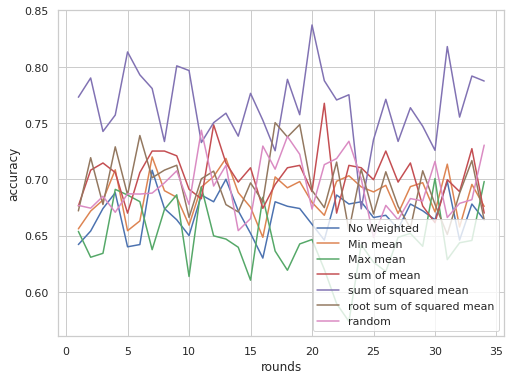

In [ ]:
# plt.title('Poisson distribution ')
fig = plt.figure(num=None, figsize=(8, 6))
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_without_wights[1:],label="No Weighted")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights1F[1:],label="Min mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights2F[1:],label="Max mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights3F[1:],label="sum of mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights4F[1:],label="sum of squared mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights5F[1:],label="root sum of squared mean")
plt.plot(range(1,len(accuracy_list_without_wights)),accuracy_list_with_wights6F[1:],label="random")

plt.legend(loc="lower right")
plt.ylabel('accuracy')
plt.xlabel('rounds')
plt.show()
fig.savefig('fig1.png')

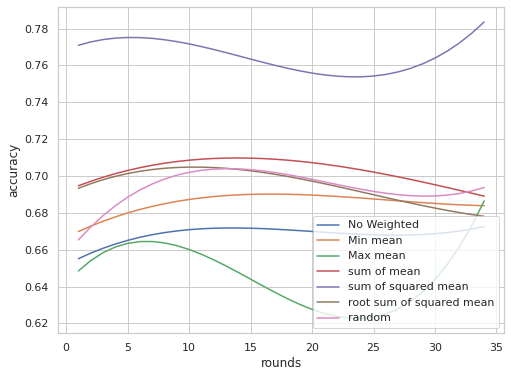

In [ ]:
# plt.title('Poisson distribution ')
from scipy import interpolate

RANGE = range(len(accuracy_list_without_wights[1:]))

fig = plt.figure(num=None, figsize=(8, 6))
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_without_wights[1:])(RANGE), label="No Weighted")
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_with_wights1F[1:])(RANGE),label="Min mean")
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_with_wights2F[1:])(RANGE),label="Max mean")
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_with_wights3F[1:])(RANGE),label="sum of mean")
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_with_wights4F[1:])(RANGE),label="sum of squared mean")
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_with_wights5F[1:])(RANGE),label="root sum of squared mean")
plt.plot(range(1,len(accuracy_list_without_wights)),interpolate.UnivariateSpline(RANGE, accuracy_list_with_wights6F[1:])(RANGE),label="random")

plt.legend(loc="lower right")
plt.ylabel('accuracy')
plt.xlabel('rounds')
plt.show()
fig.savefig('fig2.png')

In [ ]:
# # plt.title('Poisson distribution ')
# plt.plot(range(1,len(lost_list_with_wights)),lost_list_with_wights[1:],label="Weighted")
# plt.plot(range(1,len(lost_list_without_wights)),lost_list_without_wights[1:],label="Not Weighted")
# plt.legend(loc="lower right")
# plt.xlabel('accuracy')
# plt.ylabel('roundst')
# plt.show()

### Plotting

In [ ]:
import pandas as pd
def createDF(arr):
    client1 = [i[0] for i in arr]
    client2 = [i[1] for i in arr]
    client3 = [i[2] for i in arr]
    return (pd.DataFrame(client1),pd.DataFrame(client2),pd.DataFrame(client3))

In [ ]:
c1,c2,c3 = createDF(ARR)

In [ ]:
c1

In [ ]:
c2

In [ ]:
c3

Client 1

In [ ]:
import pandas as pd


f = plt.figure(figsize=(10,3))
ax1 =plt.subplot(1, 3, 1,)
ax1.set_title('class 0')
ax1.tick_params(labelrotation=90)

langs = ['round {}'.format(i) for i in range(1,len(c1)+1)]
count = list(c1[0])
ax1.bar(langs,count)

ax2 =plt.subplot(1, 3, 2)
ax2.set_title('class 1')
ax2.tick_params(labelrotation=90)
langs = ['round {}'.format(i) for i in range(1,len(c1)+1)]
count = list(c1[1])
ax2.bar(langs,count)

ax3 =plt.subplot(1, 3, 3)
ax3.set_title('class 2')
ax3.tick_params(labelrotation=90)
langs = ['round {}'.format(i) for i in range(1,len(c1)+1)]
count = list(c1[2])
ax3.bar(langs,count)

plt.show()

Client 2

In [ ]:
import pandas as pd


f = plt.figure(figsize=(10,3))
ax1 =plt.subplot(1, 3, 1,)
ax1.set_title('class 0')
ax1.tick_params(labelrotation=90)

langs = ['round {}'.format(i) for i in range(1,len(c1)+1)]
count = list(c2[0])
ax1.bar(langs,count)

ax2 =plt.subplot(1, 3, 2)
ax2.set_title('class 1')
ax2.tick_params(labelrotation=90)
langs = ['round {}'.format(i) for i in range(1,len(c1)+1)]
count = list(c2[1])
ax2.bar(langs,count)

ax3 =plt.subplot(1, 3, 3)
ax3.set_title('class 2')
ax3.tick_params(labelrotation=90)
langs = ['round {}'.format(i) for i in range(1,len(c1)+1)]
count = list(c2[2])
ax3.bar(langs,count)

plt.show()

Client3

In [ ]:
import pandas as pd


f = plt.figure(figsize=(10,3))
ax1 =plt.subplot(1, 3, 1,)
ax1.set_title('class 0')
ax1.tick_params(labelrotation=90)

langs = ['round {}'.format(i) for i in range(1,len(c1)+1)]
count = list(c3[0])
ax1.bar(langs,count)

ax2 =plt.subplot(1, 3, 2)
ax2.set_title('class 1')
ax2.tick_params(labelrotation=90)
langs = ['round {}'.format(i) for i in range(1,len(c1)+1)]
count = list(c3[1])
ax2.bar(langs,count)

ax3 =plt.subplot(1, 3, 3)
ax3.set_title('class 2')
ax3.tick_params(labelrotation=90)
langs = ['round {}'.format(i) for i in range(1,len(c1)+1)]
count = list(c3[2])
ax3.bar(langs,count)

plt.show()

In [ ]:
federated_train_data